<style>
.center {
    text-align: center;
}
</style>

<h1><center>Bsdsf21A007 - M. Soban Anjum - Assignment 1</center></h1>


Question1: Write 3 different Python functions that can create the images given below. Code them in such so
that the size of the image itself, size of boxes, size of lines and number of horizontal and vertical lines are
entered by the user.

In [2]:
from PIL import Image,ImageDraw 
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def create_image1(image_size, inner_box_size):
    img = Image.new('RGB', (image_size, image_size), 'black')
    draw = ImageDraw.Draw(img)

    upper_left = ((image_size - inner_box_size) // 2, (image_size - inner_box_size) // 2)
    lower_right = (upper_left[0] + inner_box_size, upper_left[1] + inner_box_size)
    draw.rectangle([upper_left, lower_right], fill='white')
    return img

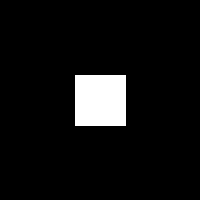

In [4]:
create_image1(200, 50)

In [5]:
def create_image2(image_size, box_size):
    img = Image.new('RGB', (image_size, image_size), 'white')
    draw = ImageDraw.Draw(img)

    positions = [
        (0, 0),
        (image_size - box_size, 0),
        (0, image_size - box_size),
        (image_size - box_size, image_size - box_size)
    ]
    for pos in positions:
        draw.rectangle([pos, (pos[0] + box_size, pos[1] + box_size)], fill='black')
    return img

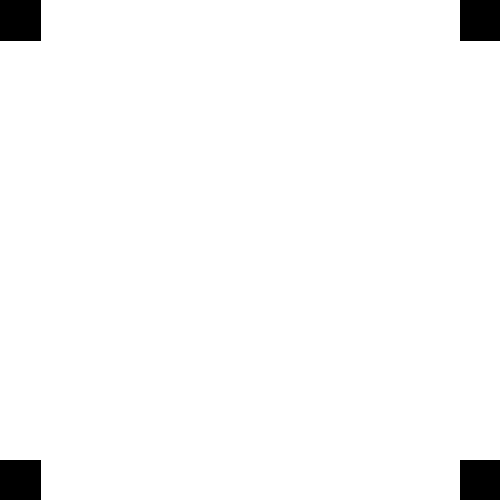

In [6]:
create_image2(500, 40)

In [7]:
def create_image3(image_size, line_thickness, num_lines):
    img = Image.new('RGB', (image_size, image_size), 'white')
    draw = ImageDraw.Draw(img)

    spacing = image_size // (num_lines + 1)

    for i in range(1, num_lines + 1):
        y = i * spacing
        draw.line([(0, y), (image_size, y)], fill='black', width=line_thickness)

    for i in range(1, num_lines + 1):
        x = i * spacing
        draw.line([(x, 0), (x, image_size)], fill='black', width=line_thickness)
    return img

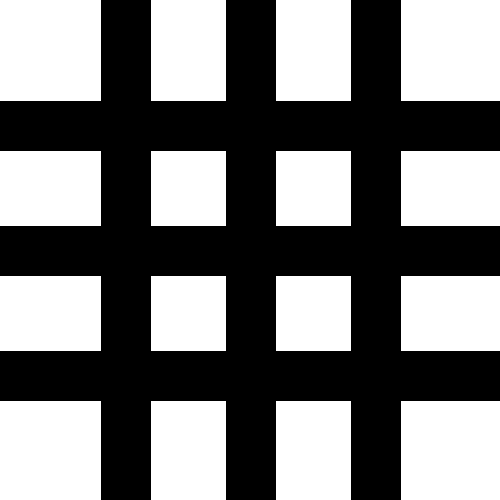

In [8]:
create_image3(500, 50,3)

Question 2: Write a function to create a white image size entered by
the user and then create 4 boxes of Black, Blue, Green and Red
respectively on each corner of the image as shown below. The size of
the colored boxes should be 1/10th the size of the image. (HINT: the
arrays of ones and zeros can be in more than 2 dimensions)

In [9]:
def colored_corners(width, height):

    image = np.ones((height, width, 3), dtype=np.uint8) * 255

    box_height = height // 10
    box_width = width // 10
    
    black = [0, 0, 0]
    blue = [0, 0, 255]
    green = [0, 255, 0]
    red = [255, 0, 0]

    image[:box_height, :box_width] = black
    image[:box_height, -box_width:] = blue
    image[-box_height:, :box_width] = green
    image[-box_height:, -box_width:] = red

    # Display the image
    plt.imshow(image)
    plt.axis('off')
    plt.show()

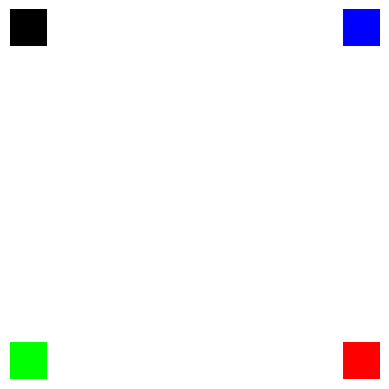

In [10]:
colored_corners(300, 300)

Question 3: Read any image that you want and save it in gray scale.
Now mirror the image that you have read at center i.e. the upper half of
the image should be the copy of the lower half but mirrored. Write the
image to the disk. See the image below.


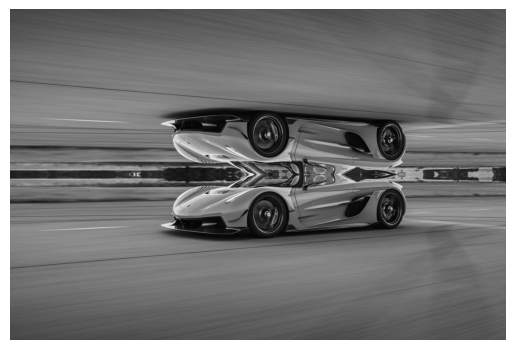

In [12]:

input_path = 'hehe.jpg'
original_image = Image.open(input_path)

gray_image = original_image.convert("L")

gray_np = np.array(gray_image)
height, width = gray_np.shape

upper_half = gray_np[:height // 2, :]
lower_half = gray_np[height // 2:, :]

mirrored_lower_half = np.flipud(lower_half)

mirrored_image_np = np.vstack((mirrored_lower_half, lower_half))

mirrored_image = Image.fromarray(mirrored_image_np)

plt.imshow(mirrored_image, cmap="gray")
plt.axis("off")
plt.show()
